In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
stats = pd.read_csv(r'Data\final_dataset_wma.csv')
stats = stats.drop('PACE',1)
stats = stats.drop('E_PACE', 1)
stats = stats.drop('Score',1)
stats = stats.drop('Odds1',1)
stats = stats.drop('Odds2',1)
print(stats.columns.values)
print(len(stats.columns.values))

['GAME_DATE' 'HOME' 'AWAY' 'AST' 'BLK' 'DREB' 'FG_PCT' 'FG3_PCT' 'FG3A'
 'FG3M' 'FGA' 'FGM' 'FT_PCT' 'FTA' 'FTM' 'OREB' 'PF' 'PLUS_MINUS' 'PTS'
 'REB' 'STL' 'TOV' 'AST_PCT' 'AST_RATIO' 'AST_TO' 'DEF_RATING' 'DREB_PCT'
 'EFG_PCT' 'E_DEF_RATING' 'E_NET_RATING' 'E_OFF_RATING' 'NET_RATING'
 'OFF_RATING' 'OREB_PCT' 'PIE' 'POSS' 'REB_PCT' 'TM_TOV_PCT' 'TS_PCT'
 'PCT_AST_2PM' 'PCT_AST_3PM' 'PCT_AST_FGM' 'PCT_FGA_2PT' 'PCT_FGA_3PT'
 'PCT_PTS_2PT' 'PCT_PTS_2PT_MR' 'PCT_PTS_3PT' 'PCT_PTS_FB' 'PCT_PTS_FT'
 'PCT_PTS_OFF_TOV' 'PCT_PTS_PAINT' 'PCT_UAST_2PM' 'PCT_UAST_3PM'
 'PCT_UAST_FGM' 'FTA_RATE' 'OPP_EFG_PCT' 'OPP_FTA_RATE' 'OPP_OREB_PCT'
 'OPP_TOV_PCT' 'OPP_PTS_2ND_CHANCE' 'OPP_PTS_FB' 'OPP_PTS_OFF_TOV'
 'OPP_PTS_PAINT' 'PTS_2ND_CHANCE' 'PTS_FB' 'PTS_OFF_TOV' 'PTS_PAINT'
 'Results']
68


C:\Users\Bei\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (70,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
X = stats.iloc[:,3:-1]
y = stats.iloc[:,-1]

In [4]:
random_state = 12
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state=random_state)

#train model
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

#evaluate
log_reg.score(X_test, y_test)

0.6008105369807497

In [5]:
stats_corr = stats.corr()['Results']. abs().sort_values(ascending=False)
stats_corr

Results               1.000000
PLUS_MINUS            0.189388
NET_RATING            0.186281
E_NET_RATING          0.184787
PIE                   0.177297
                        ...   
OPP_PTS_2ND_CHANCE    0.008731
FGA                   0.006839
POSS                  0.006399
PCT_PTS_2PT_MR        0.004903
PTS_2ND_CHANCE        0.002273
Name: Results, Length: 65, dtype: float64

In [6]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
X = stats.iloc[:,3:-1]
pca.fit(X)

PCA()

In [7]:
print("Variance (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variance (Percentage):
[2.03815104e+01 1.50610578e+01 1.15565853e+01 1.07899960e+01
 6.40728431e+00 6.19660272e+00 4.28583499e+00 4.18857846e+00
 3.60131818e+00 3.17003615e+00 2.89125371e+00 2.77228286e+00
 1.95448880e+00 1.74313076e+00 1.13407083e+00 8.57495003e-01
 5.56126700e-01 4.65133647e-01 4.39569705e-01 3.96240461e-01
 3.66845100e-01 1.99622666e-01 1.43306008e-01 9.40977988e-02
 7.26482552e-02 5.91098352e-02 4.39436329e-02 4.31064162e-02
 2.68361164e-02 2.27087239e-02 1.56258771e-02 1.43548092e-02
 1.09082120e-02 8.52504188e-03 7.64959335e-03 6.13246046e-03
 4.14722942e-03 3.52088744e-03 2.56136565e-03 2.07401095e-03
 1.29142407e-03 8.21023786e-04 5.49954586e-04 3.74813470e-04
 2.79120521e-04 1.04093642e-04 7.98320070e-05 6.39170602e-05
 3.71649446e-05 3.47570877e-05 1.44767224e-05 1.17175751e-05
 6.10960211e-06 5.48823323e-06 1.42952266e-06 1.15910678e-06
 8.19490041e-07 7.63762053e-07 6.03823507e-07 4.85353737e-07
 1.90080243e-09 1.70950928e-31 1.70950928e-31 1.70950928e-31]


In [8]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 20.38151042  35.44256825  46.99915357  57.78914953  64.19643384
  70.39303655  74.67887154  78.86745     82.46876819  85.63880434
  88.53005804  91.3023409   93.2568297   94.99996046  96.13403129
  96.99152629  97.54765299  98.01278664  98.45235634  98.8485968
  99.2154419   99.41506457  99.55837058  99.65246838  99.72511663
  99.78422647  99.8281701   99.87127652  99.89811263  99.92082136
  99.93644723  99.95080204  99.96171025  99.9702353   99.97788489
  99.98401735  99.98816458  99.99168547  99.99424683  99.99632084
  99.99761227  99.99843329  99.99898325  99.99935806  99.99963718
  99.99974127  99.99982111  99.99988502  99.99992219  99.99995694
  99.99997142  99.99998314  99.99998925  99.99999474  99.99999617
  99.99999733  99.99999815  99.99999891  99.99999951 100.
 100.         100.         100.         100.        ]



Text(0, 0.5, 'Explained variance (%)')

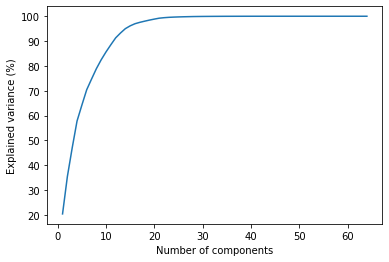

In [9]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[20.38151042 35.44256825 46.99915357 57.78914953 64.19643384 70.39303655
 74.67887154 78.86745    82.46876819 85.63880434 88.53005804 91.3023409
 93.2568297  94.99996046 96.13403129]
Number of components: 15


Text(0, 0.5, 'Explained variance (%)')

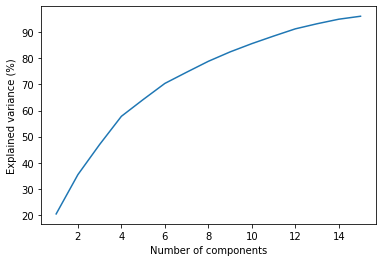

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [11]:
pca_components = abs(pca.components_)
print(pca_components)

[[2.98298750e-02 2.61413668e-03 1.10256738e-02 2.08363408e-04
  2.76382705e-04 2.71258921e-02 1.61550046e-02 4.62089779e-03
  1.52634995e-02 8.54972281e-05 9.42305666e-04 9.60065788e-04
  7.75223212e-03 3.82886100e-03 7.46653049e-02 4.76420694e-02
  3.27344164e-03 3.43417138e-03 2.52730032e-03 2.52832421e-01
  2.89392006e-01 1.65924379e-01 1.29808785e-01 2.36428119e-02
  2.20657840e-01 1.35912447e-01 2.61115401e-01 2.01728817e-01
  2.55375935e-01 1.91920316e-01 6.34202642e-02 2.65745313e-01
  2.27281583e-02 4.69209376e-02 3.89857313e-02 2.19454979e-01
  2.15983743e-01 4.74147543e-02 2.52832421e-01 1.65352820e-01
  1.65366124e-01 1.38392439e-01 7.10076441e-02 1.63623080e-01
  5.48272559e-02 5.67561037e-02 1.72002844e-02 9.02527466e-02
  2.15983561e-01 4.33100506e-02 2.52839829e-01 3.86191407e-03
  1.15172954e-01 3.93285170e-02 2.36415104e-02 3.61624074e-02
  9.38042258e-03 5.61967346e-02 5.70819313e-02 5.96595241e-02
  5.68935012e-02 1.01252524e-01 7.71133886e-02 1.57930384e-02]
 [2.024

In [12]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {stats.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['STL', 'NET_RATING', 'DREB_PCT', 'E_DEF_RATING']
Component 1: ['PCT_AST_FGM', 'PCT_AST_3PM', 'PCT_AST_2PM', 'REB_PCT']
Component 2: ['E_DEF_RATING', 'NET_RATING', 'DREB_PCT', 'PCT_AST_3PM']
Component 3: ['OPP_PTS_OFF_TOV', 'PCT_PTS_2PT', 'PCT_FGA_2PT', 'OFF_RATING']
Component 4: ['OPP_EFG_PCT', 'DEF_RATING', 'AST_PCT', 'PCT_PTS_3PT']
Component 5: ['OREB_PCT', 'PCT_FGA_2PT', 'E_OFF_RATING', 'PIE']
Component 6: ['PCT_PTS_2PT', 'OPP_PTS_OFF_TOV', 'PCT_UAST_2PM', 'PCT_PTS_2PT_MR']
Component 7: ['PCT_PTS_2PT_MR', 'PCT_UAST_2PM', 'PCT_PTS_OFF_TOV', 'TM_TOV_PCT']
Component 8: ['PCT_PTS_OFF_TOV', 'TM_TOV_PCT', 'E_OFF_RATING', 'OPP_PTS_FB']
Component 9: ['PCT_PTS_FB', 'PCT_UAST_3PM', 'E_OFF_RATING', 'OPP_FTA_RATE']
Component 10: ['PIE', 'OPP_TOV_PCT', 'PCT_FGA_2PT', 'TOV']
Component 11: ['OPP_PTS_FB', 'E_OFF_RATING', 'OPP_FTA_RATE', 'FTA_RATE']
Component 12: ['OFF_RATING', 'OPP_PTS_2ND_CHANCE', 'PCT_PTS_2PT', 'OPP_OREB_PCT']
Componen

In [13]:
X_pca = pca.transform(X)
print(X_pca.shape)
print(X_pca)

(16448, 15)
[[ 3.01176734  0.37854467 -0.49117162 ...  0.13406242 -0.8182177
  -0.09567283]
 [ 1.77610732 -3.57873725 -0.32658122 ...  0.47532845 -0.03913613
  -0.05513127]
 [ 2.49203974  2.27448949  0.01092844 ...  0.18218118  1.39313434
  -0.24023787]
 ...
 [ 1.590458    1.15601419 -0.94403961 ... -0.74826844  0.27011438
  -1.17808668]
 [ 1.21854278 -0.38280723 -1.89939996 ... -0.07281562 -1.57753478
   0.16407354]
 [-1.87381064 -3.72193357  4.37477279 ...  0.09762646 -0.57612077
  -0.34157006]]


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [15]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=15)),
                ('regressor', LogisticRegression())])

In [16]:
log_regress_model.score(X_test,y_test)

0.6010131712259372

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 32
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=32 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=32 is 0.5839918946301925


Minimum error:- 0.33002431118314424 at K = 32


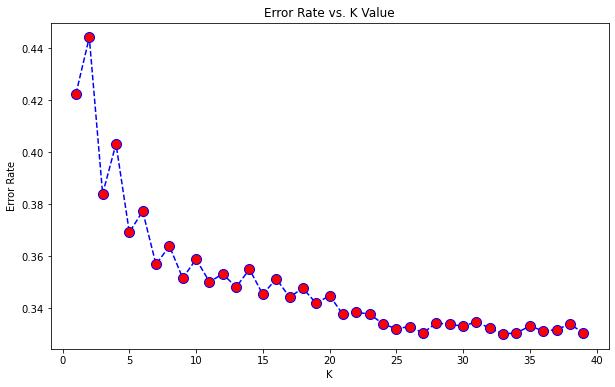

In [18]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [19]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 58.48024316109422


In [20]:
from sklearn.svm import SVC
  
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
  
prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.5849040215408668
0.5779128672745694


In [21]:

# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [22]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.6541301137844177
0.5983789260385005


In [23]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)
  
prediction = svc_model.predict(X_test)
  
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.6367584469729871
0.5912867274569402


In [24]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)
  
prediction = svc_model.predict(X_test)
  
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.5227134543559454
0.5274569402228977


In [25]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[1678 3101]
 [1112 5622]]
              precision    recall  f1-score   support

         0.0       0.60      0.35      0.44      4779
         1.0       0.64      0.83      0.73      6734

    accuracy                           0.63     11513
   macro avg       0.62      0.59      0.59     11513
weighted avg       0.63      0.63      0.61     11513



In [27]:

# importing the libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=64, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
576/576 [==============================] - 0s 427us/step - loss: 0.2859
Epoch 2/50
576/576 [==============================] - 0s 416us/step - loss: 0.2362
Epoch 3/50
576/576 [==============================] - 0s 415us/step - loss: 0.2347
Epoch 4/50
576/576 [==============================] - 0s 427us/step - loss: 0.2344
Epoch 5/50
576/576 [==============================] - 0s 419us/step - loss: 0.2340
Epoch 6/50
576/576 [==============================] - 0s 417us/step - loss: 0.2338
Epoch 7/50
576/576 [==============================] - 0s 420us/step - loss: 0.2336
Epoch 8/50
576/576 [==============================] - 0s 420us/step - loss: 0.2334
Epoch 9/50
576/576 [==============================] - 0s 422us/step - loss: 0.2333
Epoch 10/50
576/576 [==============================] - 0s 419us/step - loss: 0.2331
Epoch 11/50
576/576 [==============================] - 0s 417us/step - loss: 0.2330
Epoch 12/50
576/576 [==============================] - 0s 422us/step - loss: 0.2328
E